# 1. Bias and Variance  

$\mathbb{E}[(y - \hat{f}(x))^2] = (\text{Bias}[\hat{f}(x)])^2 + \text{Var}[\hat{f}(x)] + \sigma^2
$

**Bias**: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$   
- The difference between predicted values and true values  
- High bias indicates underfitted  
  - More complex model
  - More training

  
**Variance**:  $\mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$  
- The difference among predicted values  
- High variance indicates overfitted and too sensitive to data  
  - Bigger dataset
  - Regularization


<img src = "https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png" width = 600 height = 540>

**Bias - Variance Tradeoff**
- Low bias & low variance is ideal case.  

<img src = "http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" width = 600>

- Generalized error  
$\text{Bias}^2(\hat{y}_s, y) + \text{Var}(\hat{y}_s) + σ^2$

# 2. Regression Metrics

 ### MSE (Mean squared error)

- $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$    
- Sensitive to large errors because errors are squared  
- Using this metric can lead to overfitted models



Use case: When catching large error is important
- Finance modeling  
- Risk assessment

### MAE (Mean absolute error)

- $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$  
- No panelty to larger errors  
- Less sensitive to outliers then MSE

Use cases: Suitable for continuous data & Evaluating consistant model performance    
- Time series forcasting
  - Intuituve assessment by calculating the absolute difference  
- Medical Data (blood pressure, heart rate)

### MAPE (Mean absolute percentage error)

- $\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$  
- Measures the error as a percentage of the actual value  
- Expressed as a percentage  
- Cannot handle y=0 instances  
  Return MAE for these cases    
- Exaggerates small errors  
  ex)$y_i = 0.1,  \hat{y}_i = 0.5$. Then, MAPE = 400%


Use cases: When interested in relative percentage rather than unit
differences   
- Demand forecasting  
- Economics (inflation)

### MdAE (Median absolute error)

- $\text{MdAE} = \text{median}(|y_i - \hat{y}_i|)$  
- Less sensitive to outliers compared to MSE and MAE  

Use cases: When extreme outlier or noise exists  
- House price prediction  


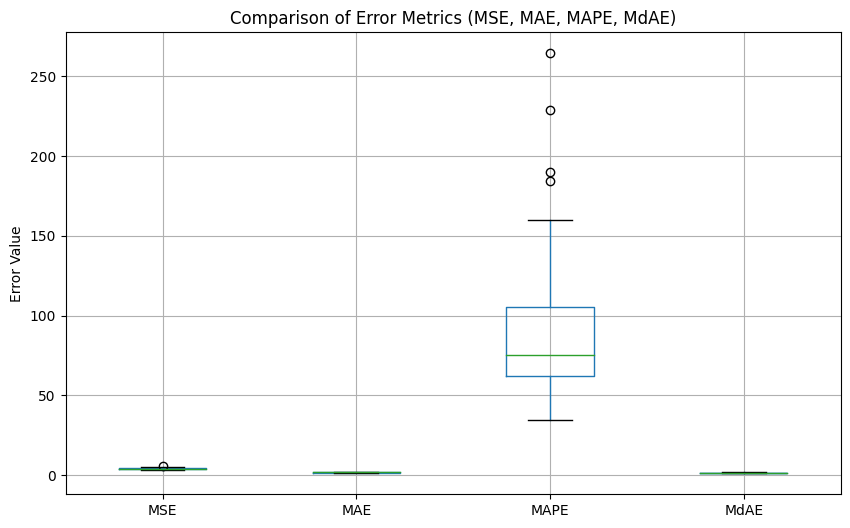

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_iterations = 50
mse_values = []
mae_values = []
mape_values = []
mdae_values = []

for _ in range(num_iterations):
    y_true = np.random.randn(100) * 10  # mean = 0, standard deviation = 10
    y_pred = y_true + np.random.randn(100) * 2  #y_true + noise

    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mdae = np.median(np.abs(y_true - y_pred))

    mse_values.append(mse)
    mae_values.append(mae)
    mape_values.append(mape)
    mdae_values.append(mdae)

results_df = pd.DataFrame({
    'MSE': mse_values,
    'MAE': mae_values,
    'MAPE': mape_values,
    'MdAE': mdae_values
})

plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Comparison of Error Metrics (MSE, MAE, MAPE, MdAE)")
plt.ylabel("Error Value")
plt.show()


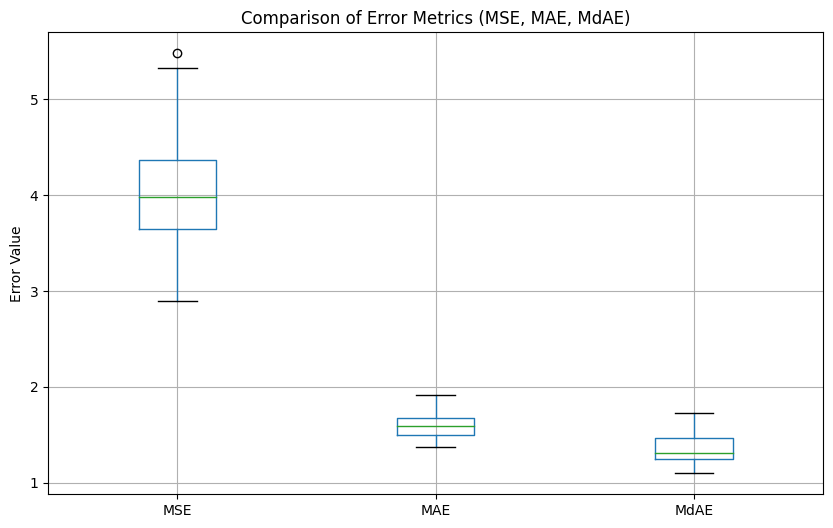

In [ ]:
results_df = pd.DataFrame({
    'MSE': mse_values,
    'MAE': mae_values,
    'MdAE': mdae_values
})

plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Comparison of Error Metrics (MSE, MAE, MdAE)")
plt.ylabel("Error Value")
plt.show()

# 3. Classification Metrics

## 3.1 Binary Classification

<img src = "https://storage.googleapis.com/lds-media/images/Confusion_Matrix.width-1200.png" width = 700>

### $\text{Precision} = \frac{TP}{TP + FP}$

- Measures the proportion of **predicted positives** that are **actually true positives**  
- Evaluates how accurate the positive predictions are  
- Used when false positive is critical, that is correct classification is important  
  - Spam filtering

### $\text{Recall} = \frac{TP}{TP + FN}$

- Measures the proportion of **actual positives** that are correctly identified by the model  
- Evaluates how many true positives the model successfully detected  
- Used in medical tests, where missing actual positive cases is critical  
  - Cancer detection  

### $\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

- The harmonic mean of Precision and Recall  
  - Harmonic mean focuses on balancing the values  
- Provides a balance between the two metrics  
- Useful when the data is imbalanced or there is a tradeoff between precision and recall
  - Crime prediction

### $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

- Measures the proportion of correctly predicted instances out of the total instances  
- Used for general classification with balanced dataset  

### ROC(Receiver Operating Characteristic) and AUC(Area Under the Curve)

- ROC : The relationship between  TPR and FPR  
  - TPR = Recall = Sensitivity = $\frac{TP}{TP + FN}$
  - FPR = $\frac{FP}{TN + FP}$  
  - The shape of the ROC curve represents the classification performance.
  - Each point on the ROC curve represents the TPR and FPR at a specific threshold.  
- AUC : Area under the curve
  - 0 ~ 1
  - AUC < 0.5: The model performance is worse than random guessing    
  - AUC = 0.5: The model performance is same as random guessing  
  - AUC > 0.5: The model performance is better than random guessing  

<div style="display: flex;">
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Uu-t4pOotRQFoyrfqEvIEg.png" alt="AUC 0.5" width="600" >
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*HmVIhSKznoW8tFsCLeQjRw.png" alt="AUC 1.0" width="300">

</div>


<div style="display: flex;">
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*yF8hvKR9eNfqqej2JnVKzg.png" alt="AUC 0.5" width="600" >
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*-tPXUvvNIZDbqXP0qqYNuQ.png" alt="AUC 1.0" width="300">

</div>

## 3.2 Multiple Classification

- One vs All Method
- Average Method
  - Micro    
  $\text{Micro Precision} = \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n} (TP_i + FP_i)}$  
  $\text{Micro Recall} = \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n} (TP_i + FN_i)}$  
    
  - Macro  
$\text{Macro Precision} = \frac{1}{n} \sum_{i=1}^{n} \text{Precision for each class}$    
$\text{Macro Recall} = \frac{1}{n} \sum_{i=1}^{n} \text{Recall for each class}$  
  - Weighted  
  $\text{Weighted Precision} = \frac{\sum_{i=1}^{n} n_i \times \text{Precision}_i}{\sum_{i=1}^{n} n_i}$  (n : number of instances in each class)  
  $\text{Weighted Recall} = \frac{\sum_{i=1}^{n} n_i \times \text{Recall}_i}{\sum_{i=1}^{n} n_i}$

One vs All Method

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

def calculate_precision_recall_f1_accuracy(y_true, y_pred):
    true_positive = np.zeros(np.max(y_true) + 1)
    false_positive = np.zeros(np.max(y_true) + 1)
    false_negative = np.zeros(np.max(y_true) + 1)
    true_negative = np.zeros(np.max(y_true) + 1)

    for i in range(len(y_true)):
        if y_pred[i] == y_true[i]:
            true_positive[y_true[i]] += 1
            for label in range(np.max(y_true) + 1):
                if label != y_true[i]:
                    true_negative[label] += 1
        else:
            false_positive[y_pred[i]] += 1
            false_negative[y_true[i]] += 1

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(true_positive) / len(y_true)

    return precision, recall, f1_score, accuracy

precision, recall, f1_score, accuracy = calculate_precision_recall_f1_accuracy(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"Accuracy: {accuracy:.4f}")

Precision: [1.         1.         0.86666667]
Recall: [1.         0.77777778 1.        ]
F1-Score: [1.         0.875      0.92857143]
Accuracy: 0.9333


Average Method

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Micro-Average Precision: {precision_micro:.4f}, Recall: {recall_micro:.4f}, F1-Score: {f1_micro:.4f}")
print(f"Macro-Average Precision: {precision_macro:.4f}, Recall: {recall_macro:.4f}, F1-Score: {f1_macro:.4f}")
print(f"Weighted-Average Precision: {precision_weighted:.4f}, Recall: {recall_weighted:.4f}, F1-Score: {f1_weighted:.4f}")

Micro-Average Precision: 0.9333, Recall: 0.9333, F1-Score: 0.9333
Macro-Average Precision: 0.9556, Recall: 0.9259, F1-Score: 0.9345
Weighted-Average Precision: 0.9422, Recall: 0.9333, F1-Score: 0.9315


# 4. SHAP (SHapley Additive exPlanations) importance

- Explains how each feature contributes to an **individual prediction** by SHAP values  
- Not related to correlation or linearity because it focuses on explaining a single prediction for one data point  
- **Positive SHAP value**: Indicates that the feature contributes to increasing the prediction.
- **Negative SHAP value (down term)**: Indicates that the feature contributes to decreasing the prediction  

$\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} \left[ f(S \cup \{i\}) - f(S) \right]$   
- $\sum$ Weight * Prediction difference

- $\phi_i$: **SHAP value** for feature i   

- $S$: A subset of all features **excluding feature i**  

- $N$: The set of all features  

- $f(S)$: The model's prediction using Subset $S$, that excludes feature i  

- $f(S \cup \{i\})$: The model's prediction using subset $S$ with feature i added  

- $\frac{|S|!(|N|-|S|-1)!}{|N|!}$: **Weight**, ensures contribution of each feature is fairly reflected across all possible feature combinations


$f(x) = \phi_0 + \sum_{i=1}^{M} \phi_i$  
- The sum of all SHAP values added to null model prediction equals to the model output

In [ ]:
import itertools

def model(x1, x2, x3):
    return 3 * x1 + 2 * x2 + x3

# data point to calculate SHAP value
x = [1, 0, 1]

# S
features = [0, 1, 2]
subsets = list(itertools.chain.from_iterable(itertools.combinations(features, r) for r in range(len(features) + 1)))

def shap_value(feature_idx, x):
    shap_val = 0
    for subset in subsets:
        if feature_idx not in subset:
            subset_with_feature = list(subset) + [feature_idx]

            # f(S with feature i), f(S)
            pred_with_feature = model(*(x[i] if i in subset_with_feature else 0 for i in range(3)))
            pred_without_feature = model(*(x[i] if i in subset else 0 for i in range(3)))

            # contribution:f(S with feature i) - f(S)
            contribution = pred_with_feature - pred_without_feature

            # Contribution * Weight
            shap_val += contribution / (len(subset_with_feature) * len(subsets))

    return shap_val

shap_x1 = shap_value(0, x)
shap_x2 = shap_value(1, x)
shap_x3 = shap_value(2, x)

print(f"SHAP value for x1: {shap_x1}")
print(f"SHAP value for x2: {shap_x2}")
print(f"SHAP value for x3: {shap_x3}")

base_value = model(0, 0, 0)  # null model prediction
model_output = base_value + shap_x1 + shap_x2 + shap_x3
print(f"Model output: {model_output}")


SHAP value for x1: 0.875
SHAP value for x2: 0.0
SHAP value for x3: 0.2916666666666667
Model output: 1.1666666666666667


---

Reference:  
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc  
- https://towardsdatascience.com/mse-and-bias-variance-decomposition-77449dd2ff55  
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html  
- https://www.learndatasci.com/glossary/precision-and-recall/  
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

